In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')
df = df.rename(columns={'User ID': 'user_id', 'Fan Challenges Completed': 'challenge_completion','Predictive Accuracy (%)':'predictive_accuracy','Virtual Merchandise Purchases':'merch_purchases','Sponsorship Interactions (Ad Clicks)':'ad_clicks','Time on Live 360 (mins)':'time_on_live','Real-Time Chat Activity (Messages Sent)':'messages_sent'})
df.head(10)

,user_id,challenge_completion,predictive_accuracy,merch_purchases,ad_clicks,time_on_live,messages_sent
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8
5,U006,10,85,6,12,180,25
6,U007,6,75,4,5,130,15
7,U008,9,95,2,9,150,45
8,U009,4,65,1,2,80,10
9,U010,3,55,0,4,95,6


In [3]:
df = df.drop(columns=['user_id'])

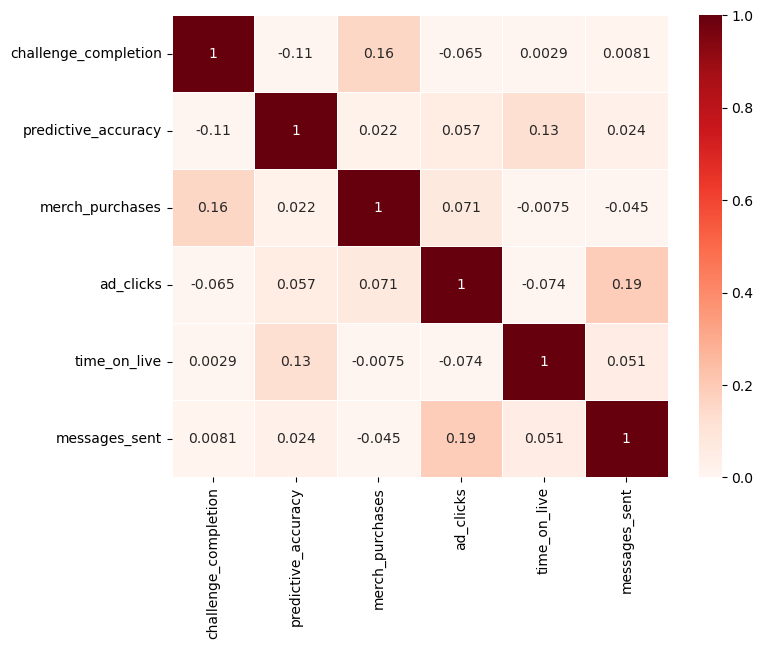

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.5, vmin=0)
plt.show()

## No clear correlations between any variables from a glance

# What trends exist through out the duration of an event?

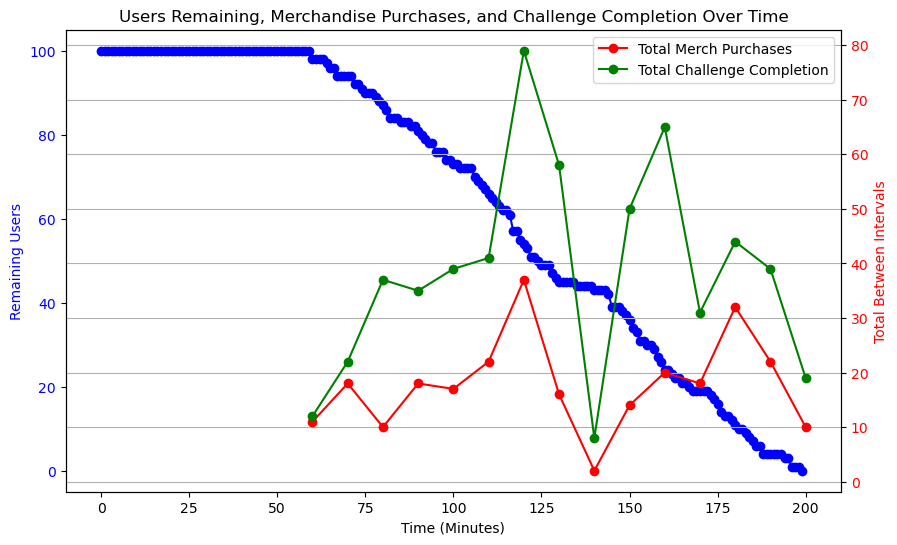

In [5]:
df['time_on_live'] = pd.to_numeric(df['time_on_live'], errors='coerce')
df['merch_purchases'] = pd.to_numeric(df['merch_purchases'], errors='coerce')
df['challenge_completion'] = pd.to_numeric(df['challenge_completion'], errors='coerce')

time_range = range(0, int(df['time_on_live'].max()) + 1)
remaining_users = []

for t in time_range:
    users_remaining = (df['time_on_live'] > t).sum()
    remaining_users.append(users_remaining)

interval = 10
max_time = int(df['time_on_live'].max())

time_intervals = []
total_merch_purchases = []
total_challenge_completion = []

for t in range(0, max_time + interval, interval):
    users_left = df[(df['time_on_live'] > t - interval) & (df['time_on_live'] <= t)]
    
    if not users_left.empty:
        total_purchases = users_left['merch_purchases'].sum()
        total_challenges = users_left['challenge_completion'].sum()
    else:
        total_purchases = np.nan
        total_challenges = np.nan
    
    time_intervals.append(t)
    total_merch_purchases.append(total_purchases)
    total_challenge_completion.append(total_challenges)

result_df = pd.DataFrame({
    'Time (Minutes)': time_intervals,
    'Total Merch Purchases': total_merch_purchases,
    'Total Challenge Completion': total_challenge_completion
})

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Time (Minutes)')
ax1.set_ylabel('Remaining Users', color='blue')
ax1.plot(time_range, remaining_users, color='blue', marker='o', label='Remaining Users')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Total Between Intervals', color='red')
ax2.plot(result_df['Time (Minutes)'], result_df['Total Merch Purchases'], color='red', marker='o', label='Total Merch Purchases')
ax2.plot(result_df['Time (Minutes)'], result_df['Total Challenge Completion'], color='green', marker='o', label='Total Challenge Completion')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Users Remaining, Merchandise Purchases, and Challenge Completion Over Time')
plt.grid(True)
plt.legend()
plt.show()

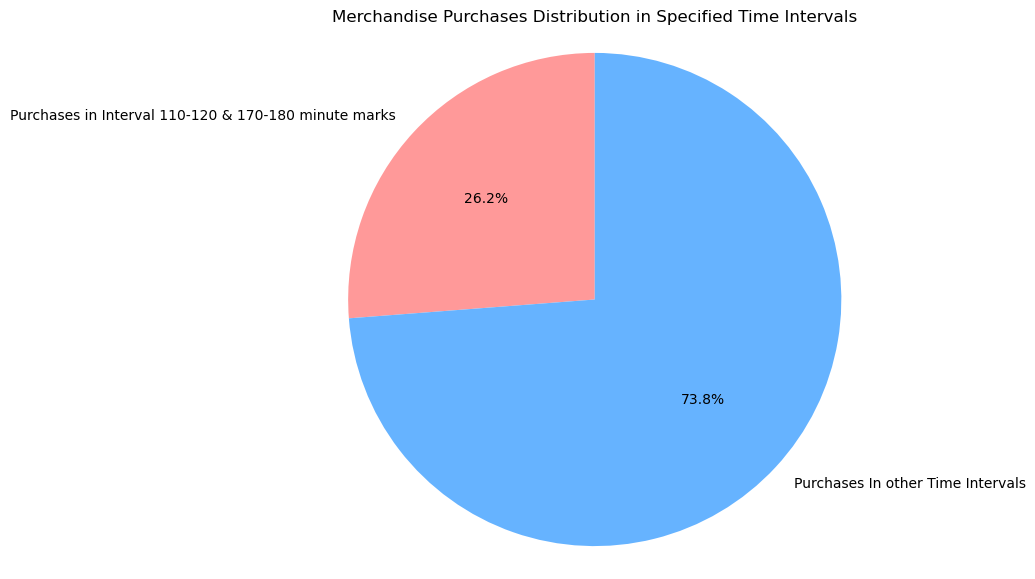

In [6]:
df['g120180'] = np.where(((df['time_on_live'] >= 110) & (df['time_on_live'] <= 120)) | ((df['time_on_live'] >= 170) & (df['time_on_live'] <= 180)), 1, 0)

subset_df = df[df['g120180'] == 1]
total_merch_purchases = subset_df['merch_purchases'].sum()
total_other_purchases = df['merch_purchases'].sum() - total_merch_purchases
labels = ['Purchases in Interval 110-120 & 170-180 minute marks', 'Purchases In other Time Intervals']
sizes = [total_merch_purchases, total_other_purchases]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Merchandise Purchases Distribution in Specified Time Intervals')
plt.axis('equal')
plt.show()

df = df.drop(columns=['g120180'])

## The data suggests a noticeable increase in merchandise sales just before the next full hour, indicating that something may be driving this surge in activity.

### Over a quarter of all sales occur within the 10 minutes leading up to the two- and three-hour marks. This suggests that a specific event or transition is causing user behavior at these times. One possibility could be that these are the start of a new race or game if multiple events are scheduled, which could prompt fans to make last-minute purchases before the action begins. Alternatively, this spike could coincide with the deadline for placing bets, encouraging users to finalize their purchases. Another explanation could be that these timeframes may signal scheduled breaks, giving users an opportunity to shift their attention towards merchandise while they wait for the next event.

### My hypothesis is reinforced by the trend observed in challenge completions. We see that the majority of challenges are finished around the same time that merchandise sales peak. This alignment suggests a connection between the completion of fan challenges and increased purchasing activity, possibly due to users being rewarded with incentives or promotions upon finishing challenges, or simply having free time to shop once their tasks are complete.

### My suggestion: By leveraging these crucial moments within the race day schedules we can further drive sales and engagment. Targeted promotions or time-sensitive offers during these high-activity periods could encourage users to make more purchases and stay engaged with the event. Capitalizing on these natural spikes in activity will not only enhance the user experience but also maximize revenue opportunities by aligning marketing efforts with the behavioral patterns of the audience.

## User retention is also a crucial factor to consider here.

### As seen in the trend of the blue dotted line, it's evident that nearly all users on the VeloCityX app remain active for the first hour of the race. However, a steady decline in engagement begins around the 60-minute mark, tapering off completely by the 200-minute mark. This gradual drop in user activity suggests that we have a prime opportunity to focus promotional efforts on the highly engaged audience during this initial phase of the event. By targeting merchandise offers and incentives to these early participants—while their attention and enthusiasm are still high—we could capitalize on the peak engagement window and drive higher conversion rates.

# Should we focus our attention towards user retention or event / merchandise promotion?

### (The 130 minute mark is chosen since it is the halfway point between the first user leaving and the last user leaving)

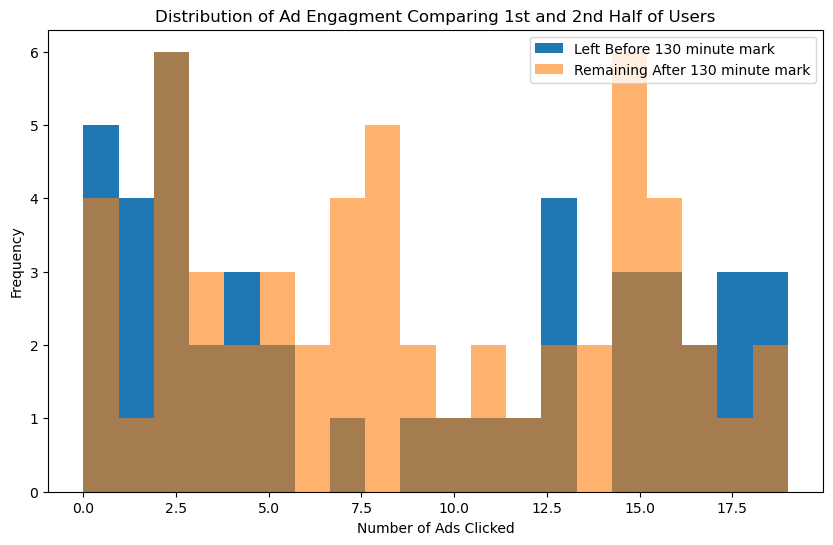

In [7]:
subset = np.where(df['time_on_live'] > 130)
df2 = df.iloc[subset]

subset = np.where(df['time_on_live'] <= 130)
df3 = df.iloc[subset]

plt.figure(figsize=(10,6))
plt.hist(df2['ad_clicks'], bins=20, alpha=1, label='Left Before 130 minute mark')
plt.hist(df3['ad_clicks'], bins=20, alpha=0.6,label='Remaining After 130 minute mark')
plt.xlabel('Number of Ads Clicked')
plt.ylabel('Frequency')
plt.title('Distribution of Ad Engagment Comparing 1st and 2nd Half of Users')
plt.legend(loc='upper right')
plt.show()

In [8]:
df2['ad_clicks'].describe()

count    45.000000
mean      8.511111
std       6.959696
min       0.000000
25%       2.000000
50%       7.000000
75%      15.000000
max      19.000000
Name: ad_clicks, dtype: float64

In [9]:
df3['ad_clicks'].describe()

count    55.000000
mean      8.818182
std       5.847098
min       0.000000
25%       3.500000
50%       8.000000
75%      15.000000
max      19.000000
Name: ad_clicks, dtype: float64

/var/folders/bt/drxprk155fvg7gjf3ztl7z3r0000gn/T/ipykernel_74938/2050511965.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Left After 130 min', 'Left Before or At 130 min'], patch_artist=True)


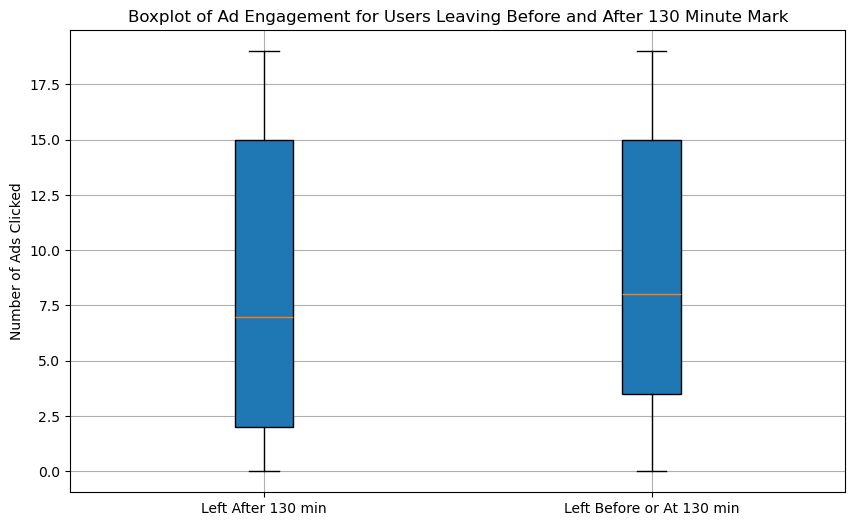

In [10]:
data = [df2['ad_clicks'], df3['ad_clicks']]

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['Left After 130 min', 'Left Before or At 130 min'], patch_artist=True)
plt.title('Boxplot of Ad Engagement for Users Leaving Before and After 130 Minute Mark')
plt.ylabel('Number of Ads Clicked')
plt.grid(True)
plt.show()


## The boxplot shows that users who leave the app before or after the 130-minute mark have similar ad engagement.

### This indicates that the time users spend on the app does not significantly affect how they interact with ads, suggesting that ad engagement is relatively consistent regardless of session length. With the median number of ad clicks being nearly the same, there’s no clear indication that staying longer results in higher ad interactions. Given this, the company could focus on optimizing ad engagement earlier in the user session. Since ad interaction seems stable across time, introducing targeted ads or incentives for ad engagement in the first half of the event might help drive more clicks.

# Can we use predictive accuracy to guage user interest in merchandise?

In [14]:
lower_subset = np.where(df['predictive_accuracy'] <= np.quantile(df['predictive_accuracy'],0.25))
upper_subset = np.where(df['predictive_accuracy'] >= np.quantile(df['predictive_accuracy'],0.75))

df4 = df.iloc[lower_subset]
df5 = df.iloc[upper_subset]

In [27]:
df4['ad_clicks'].describe()

count    26.000000
mean      7.807692
std       7.105036
min       0.000000
25%       1.250000
50%       7.500000
75%      14.750000
max      19.000000
Name: ad_clicks, dtype: float64

In [28]:
df5['ad_clicks'].describe()

count    25.000000
mean      8.480000
std       5.083634
min       1.000000
25%       4.000000
50%       9.000000
75%      13.000000
max      18.000000
Name: ad_clicks, dtype: float64

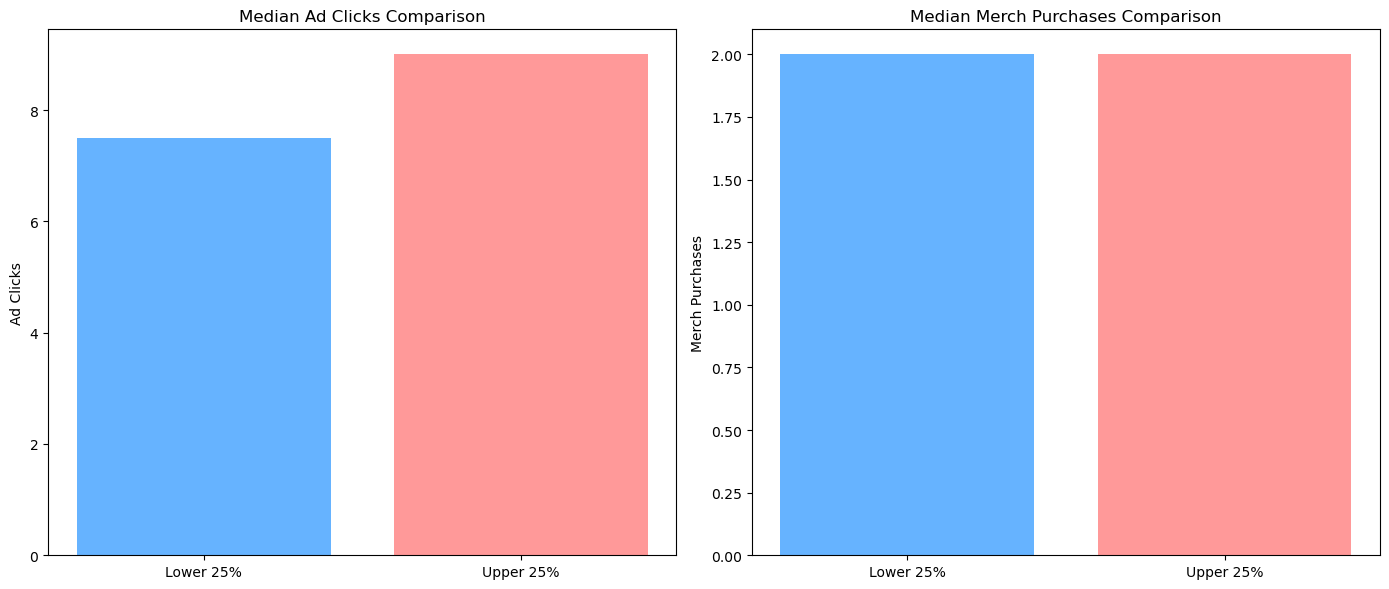

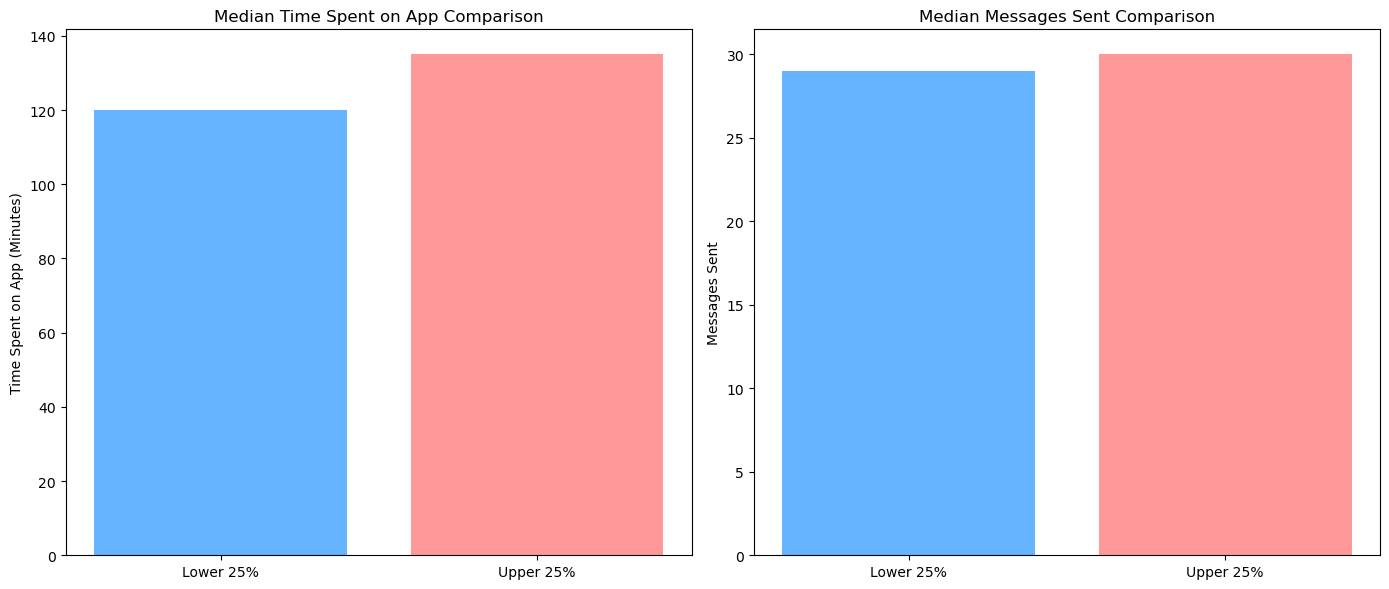

In [39]:
mean_ad_clicks_lower = df4['ad_clicks'].median()
mean_ad_clicks_upper = df5['ad_clicks'].median()
mean_merch_purchases_lower = df4['merch_purchases'].median()
mean_merch_purchases_upper = df5['merch_purchases'].median()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(['Lower 25%', 'Upper 25%'], [mean_ad_clicks_lower, mean_ad_clicks_upper], color=['#66b3ff', '#ff9999'])
axes[0].set_title('Median Ad Clicks Comparison')
axes[0].set_ylabel('Ad Clicks')

axes[1].bar(['Lower 25%', 'Upper 25%'], [mean_merch_purchases_lower, mean_merch_purchases_upper], color=['#66b3ff', '#ff9999'])
axes[1].set_title('Median Merch Purchases Comparison')
axes[1].set_ylabel('Merch Purchases')

plt.tight_layout()
plt.show()

mean_time_lower = df4['time_on_live'].median()
mean_time_upper = df5['time_on_live'].median()
mean_messages_lower = df4['messages_sent'].median()
mean_messages_upper = df5['messages_sent'].median()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].bar(['Lower 25%', 'Upper 25%'], [mean_time_lower, mean_time_upper], color=['#66b3ff', '#ff9999'])
axes[0].set_title('Median Time Spent on App Comparison')
axes[0].set_ylabel('Time Spent on App (Minutes)')
axes[1].bar(['Lower 25%', 'Upper 25%'], [mean_messages_lower, mean_messages_upper], color=['#66b3ff', '#ff9999'])
axes[1].set_title('Median Messages Sent Comparison')
axes[1].set_ylabel('Messages Sent')

plt.tight_layout()
plt.show()


### The comparisons suggest some interesting trends. For ad clicks, the upper 25% of users have slightly more engagement than those in the lower 25%, indicating that more accurate users tend to interact with ads more frequently. In contrast, there is almost no difference in merchandise purchases between the two groups, suggesting that predictive accuracy may not strongly influence users' purchasing behavior. In terms of time spent on the app, the upper 25% of users stay on the app for a slightly longer period compared to those in the lower 25%. This indicates that users who are more accurate in their predictions are also more engaged with the platform for a longer time, potentially giving them more opportunities to interact with features like ads or other content. However, when it comes to messages sent, both groups appear to have nearly identical levels of engagement, implying that the amount of messages on the platform is not influenced by a user’s predictive accuracy.

## Potential Steps for the Company:
### 1. Target High Predictive Accuracy Users: Given that users in the upper 25% tend to click on more ads and spend more time on the app, the company could target these users with personalized ad campaigns or special offers, capitalizing on their higher engagement levels.

### 2. Incentivize Lower Predictive Accuracy Users: For users in the lower 25%, the company could implement strategies to boost their engagement, such as offering incentives for interacting with ads or increasing their time on the app. These users could also benefit from tailored challenges or features that encourage more interaction with the platform.

### 3. Focus on Retention Through Engagement: Since time spent on the app and messages sent are relatively consistent across both groups, the company should consider ways to keep users engaged longer by introducing more dynamic content or rewards for app usage milestones. By maintaining engagement, the company can increase the likelihood of ad interactions and purchases from both high- and low-predictive accuracy users.